In [130]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

In [131]:
api = wandb.Api()

In [163]:
sweep_ids = ("w77hhdyd",)
sweeps = [api.sweep(f"project-avengers/goon-test/sweeps/{sweep_id}") for sweep_id in sweep_ids]

In [164]:
results = []
last_step = 2048
for s in sweeps:
    runs = s.runs
    for r in runs:
        if r.state == "finished":
            config = deepcopy(r.config)
            losses =[x for x in r.scan_history(min_step=last_step, keys=["loss"])]
            assert len(losses) == 1
            config["loss"] = losses[0]["loss"]
            results.append(config)

In [165]:
results_df = pd.DataFrame(results)
results_df

,mup,d_model,n_layer,tracker,weights,col_name,datasets,head_dim,acc_steps,bos_token,...,batch_size,seq_length,vocab_size,learning_rate,tokenizer_path,report_interval,mup_base_d_model,use_torch_compile,mup_simple_scaling_impl,loss
0,False,1024,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.000100,/datasets/tokenizers/llama3,64,256,False,False,5.126884
1,True,1024,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.000046,/datasets/tokenizers/llama3,64,256,False,False,6.035288
2,False,1024,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.000046,/datasets/tokenizers/llama3,64,256,False,False,5.572494
3,True,1024,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.000100,/datasets/tokenizers/llama3,64,256,False,False,5.631065
4,True,1024,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.000215,/datasets/tokenizers/llama3,64,256,False,False,5.133763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,True,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.010000,/datasets/tokenizers/llama3,64,256,False,False,4.869515
60,False,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.021540,/datasets/tokenizers/llama3,64,256,False,False,4.781928
61,False,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.010000,/datasets/tokenizers/llama3,64,256,False,False,4.579953
62,True,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,4,512,128256,0.004642,/datasets/tokenizers/llama3,64,256,False,False,4.617744


[None]

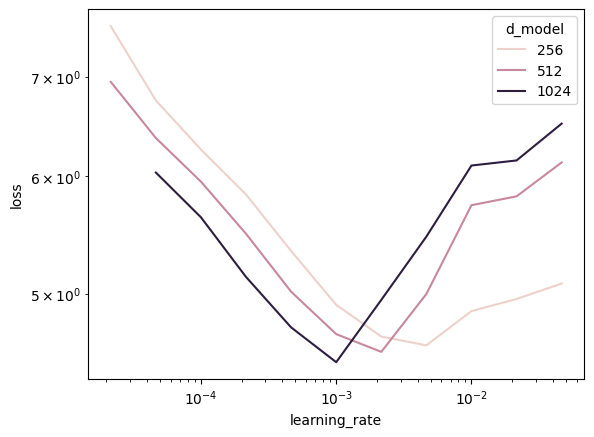

In [166]:
no_mup_plot = sns.lineplot(data=results_df[results_df.mup], x="learning_rate", y="loss", hue="d_model")
no_mup_plot.set(xscale="log")
no_mup_plot.set(yscale="log")

[None]

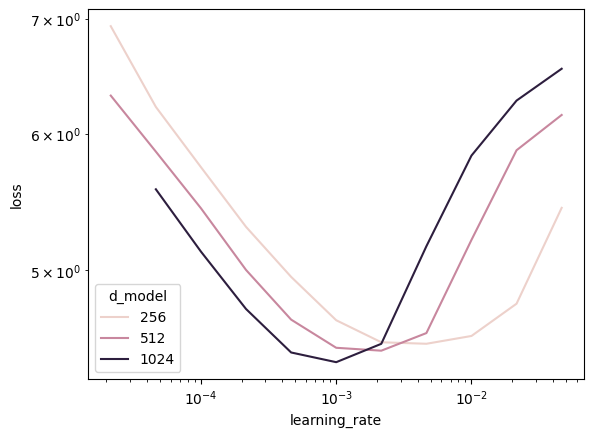

In [167]:
no_mup_plot = sns.lineplot(data=results_df[~results_df.mup], x="learning_rate", y="loss", hue="d_model")
no_mup_plot.set(xscale="log")
no_mup_plot.set(yscale="log")


In [168]:
results_df["lr_adj"] = results_df.learning_rate / (results_df.mup_base_d_model / results_df.d_model)

In [ ]:
no_mup_plot2 = sns.lineplot(data=results_df[~results_df.mup], x="lr_adj", y="loss", hue="d_model")
no_mup_plot2.set(xscale="log")
no_mup_plot2.set(yscale="log")

[None]